## Описание данных
---
-    `Name` — название игры
-    `Platform` — платформа
-    `Year_of_Release` — год выпуска
-    `Genre` — жанр игры
-    `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
-    `EU_sales` — продажи в Европе (миллионы проданных копий)
-    `JP_sales` — продажи в Японии (миллионы проданных копий)
-    `Other_sales` — продажи в других странах (миллионы проданных копий)
-    `Critic_Score` — оценка критиков (максимум 100)
-    `User_Score` — оценка пользователей (максимум 10)
-    `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Предобработка и обзор данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/da-3-games.csv')

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Год выпуска, название, жанр, оценки и рейтинг имеют пропуски. Заполнить их нельзя, потому что медианные или средние значения испортят статистику оценок, а жанр или рейтинг можно заполнить только вручную, с помощью поиска в интернете.

Пока оставляю так, в дальнейшем для исследований буду использовать соответствующие данные без пропусков.

In [ ]:
df.columns = df.columns.str.lower()

Преобразую названия в столбцов в нижний регистр для удобства работы.

In [ ]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [ ]:
df[df['user_score'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Проверяю, что нулевых значений нет, чтобы заменить tbd на 0 для удобства дальнейшей обработки.

In [ ]:
df['user_score'] = df['user_score'].replace('tbd', 0)

In [ ]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['other_sales'] + df['jp_sales']

## Анализ данных

Считаю суммарные продажи путем складывания продаж со всех регионов.

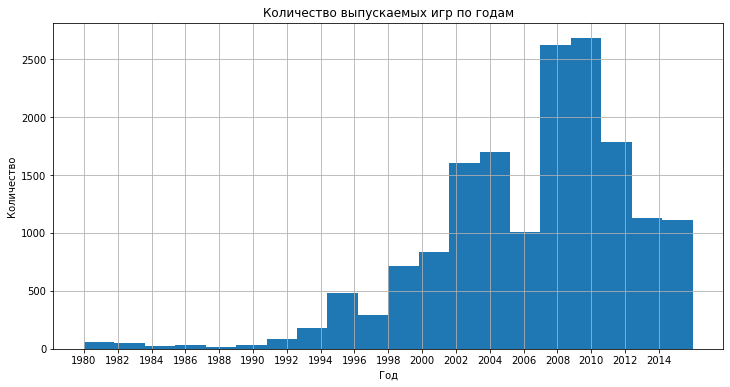

In [ ]:
plot = df['year_of_release'].plot(kind = 'hist', grid = True, bins = 20, xticks = range(1980, 2016, 2),
                                 figsize = (12,6), title = 'Количество выпускаемых игр по годам')
plot.set_xlabel('Год')
plot.set_ylabel('Количество')
plt.show()

Довольно большой рост в выпуске игр после 1998 года.

In [ ]:
df.groupby('platform')['sum_sales'].mean().sort_values(ascending = False)

platform
GB      2.606735
NES     2.561735
GEN     1.061034
SNES    0.836987
PS4     0.801378
X360    0.769746
2600    0.729173
PS3     0.705973
Wii     0.687508
N64     0.685517
XOne    0.645020
PS      0.610576
PS2     0.581106
WiiU    0.559116
3DS     0.498077
GBA     0.386679
DS      0.374765
GC      0.357788
XB      0.312791
SCD     0.310000
DC      0.306731
PC      0.266448
PSP     0.243218
WS      0.236667
SAT     0.194162
PSV     0.125744
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: sum_sales, dtype: float64

In [ ]:
df.groupby('platform')['sum_sales'].sum().sort_values(ascending = False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

Самой популярной игровой платформой по средним продажам является GB, а по суммарным продажам - PS2.

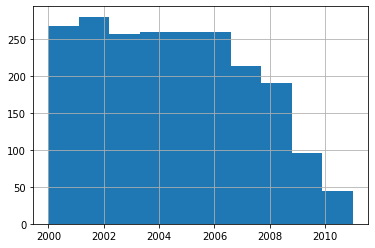

In [ ]:
df[df['platform'] == 'PS2']['year_of_release'].hist()

Которая прожила до 2011 года.

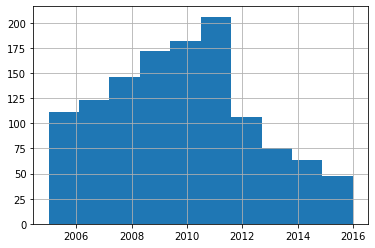

In [ ]:
df[df['platform'] == 'X360']['year_of_release'].hist()

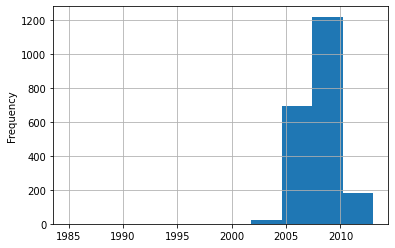

In [ ]:
df[df['platform'] == 'DS']['year_of_release'].plot(kind = 'hist', grid = True)

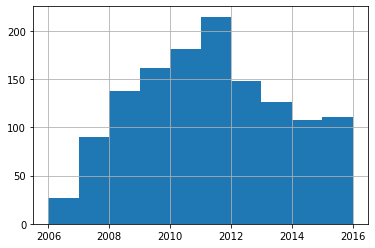

In [ ]:
df[df['platform'] == 'PS3']['year_of_release'].hist()

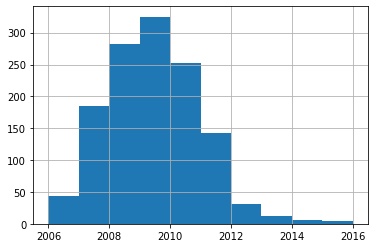

In [ ]:
df[df['platform'] == 'Wii']['year_of_release'].hist()

Для пяти самых популярных платформ (в свое время) жизненный цикл равен примерно 10 лет.
При этом видим пик продаж примерно по середине жизненного цикла.

In [ ]:
df = df[df['year_of_release'] > 2007].copy()

Далее буду работать со срезом, начиная с 2007 года, что укладывается в примерный жизненный цикл платформы (2017-10).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8130 entries, 2 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8130 non-null   object 
 1   platform         8130 non-null   object 
 2   year_of_release  8130 non-null   float64
 3   genre            8130 non-null   object 
 4   na_sales         8130 non-null   float64
 5   eu_sales         8130 non-null   float64
 6   jp_sales         8130 non-null   float64
 7   other_sales      8130 non-null   float64
 8   critic_score     3678 non-null   float64
 9   user_score       5185 non-null   object 
 10  rating           5105 non-null   object 
 11  sum_sales        8130 non-null   float64
dtypes: float64(7), object(5)
memory usage: 825.7+ KB


In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int64', errors = 'ignore')

Преобразовываю год выпуска в инт, так как он не может быть не целым числом.

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80


In [ ]:
df_pivot = df.pivot_table(index = 'platform', values = 'sum_sales').sort_values(by = 'sum_sales',ascending = False)

In [ ]:
df_pivot

,sum_sales
platform,
X360,0.807575
PS4,0.801378
PS3,0.704113
XOne,0.645020
Wii,0.568836
WiiU,0.559116
3DS,0.503535
DS,0.277175
PS2,0.260211


По суммарной прибыли лидирует иксбокс 360, за ним ПС4, хбокс ван еще не успел догнать. Далее пострю графики по распределению продаж по годам, чтобы исключить "угасающие платформы".

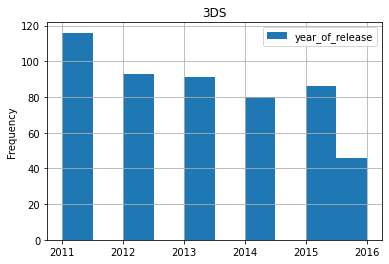

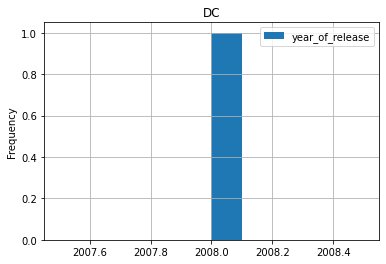

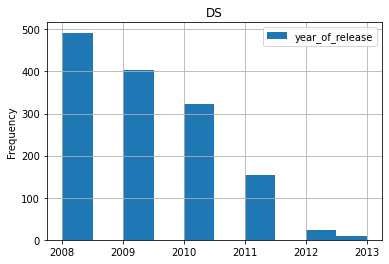

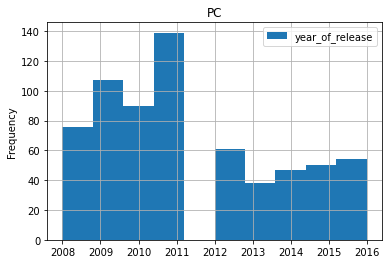

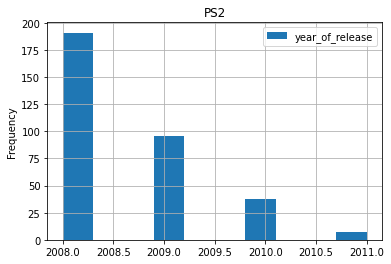

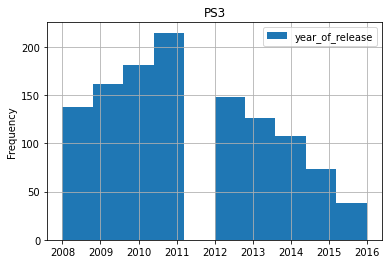

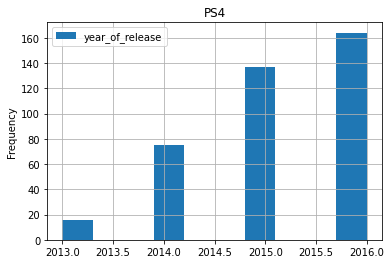

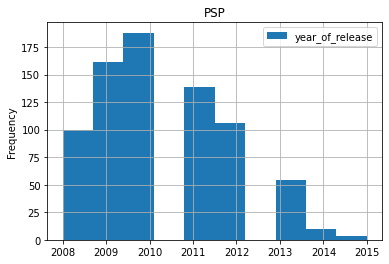

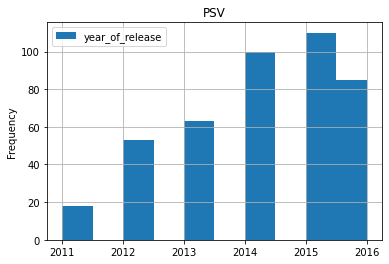

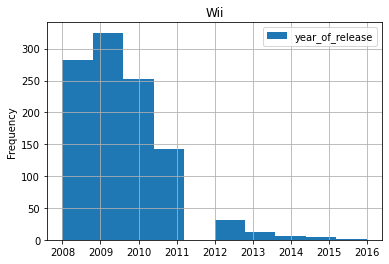

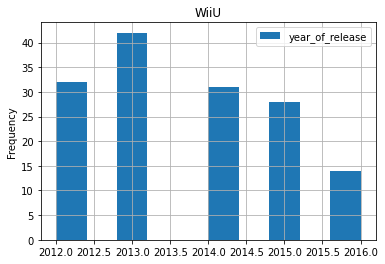

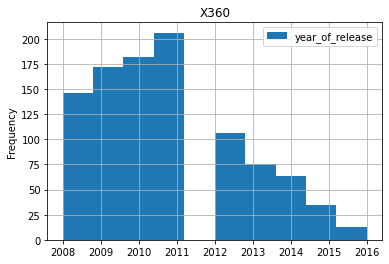

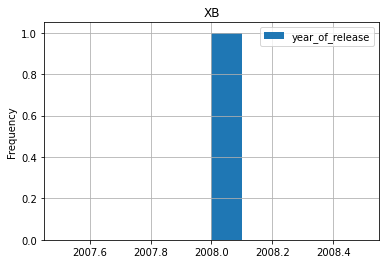

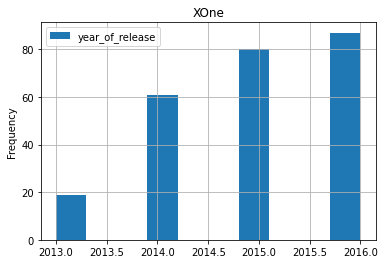

In [ ]:
for name, group_data in df.groupby('platform'):
    group_data.plot(kind = 'hist', y = 'year_of_release', title = name, grid = True)

Можно исключить платформы: DC, GBA, GC, PS2, XB, DS, так как они уже не актуальны и далее работать с оставшимся срезом.

In [ ]:
filt = ['DC', 'GBA', 'GC', 'PS2', 'XB', 'DS']

In [ ]:
df = df.query('platform not in @filt')

In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
2,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
3,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
4,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80


In [ ]:
df.pivot_table(index = 'platform', values = 'sum_sales').sort_values(by = 'sum_sales',ascending = False)

,sum_sales
platform,
X360,0.807575
PS4,0.801378
PS3,0.704113
XOne,0.645020
Wii,0.568836
WiiU,0.559116
3DS,0.503535
PC,0.228535
PSP,0.179212


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


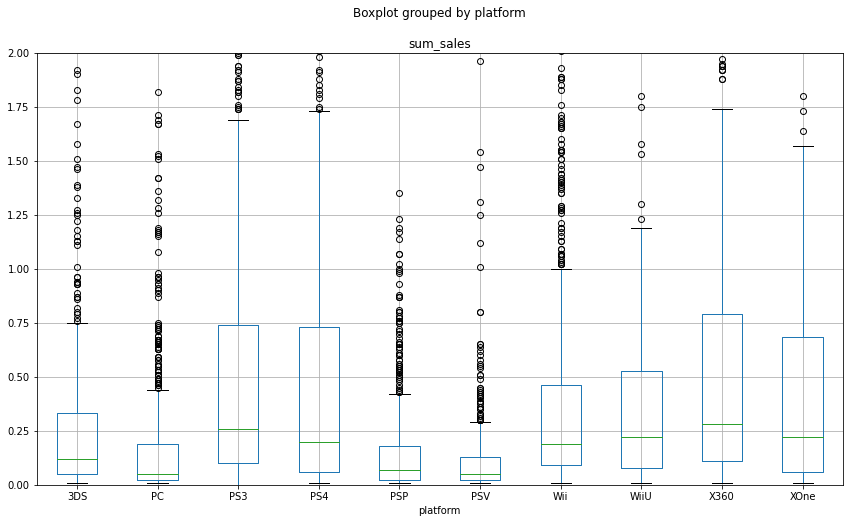

In [ ]:
plot = df.boxplot('sum_sales', by = 'platform', figsize = (14,8))
plot.set_ylim(0,2)
plt.show()

По суммарным продажам лидирует х360 и пс3, пс4, х1 и вию догоняют. ПК почти в самом низу, что удивительно.

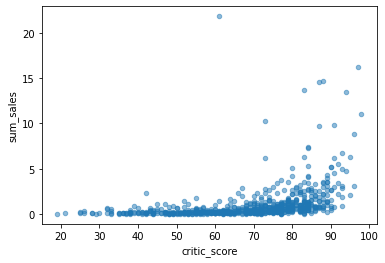

In [ ]:
df[df['platform'] == 'X360'].plot(kind = 'scatter', y = 'sum_sales', x = 'critic_score', alpha = 0.5)

In [ ]:
df[df['platform'] == 'X360']['sum_sales'].corr(df['critic_score'])

0.3886526625814236

In [ ]:
sample = df.dropna(subset = ['user_score']).copy()

In [ ]:
sample['user_score'] = sample['user_score'].astype('float')

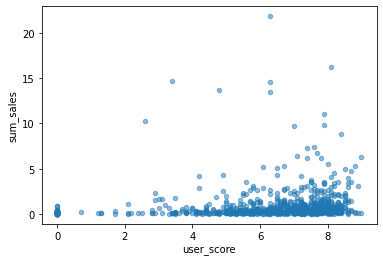

In [ ]:
sample[sample['platform'] == 'X360'].plot(kind = 'scatter', y = 'sum_sales', x = 'user_score', alpha = 0.5)

In [ ]:
sample[sample['platform'] == 'X360']['sum_sales'].corr(sample['user_score'])

0.1658649994457136

В обоих случаях заметно слабое влияние оценок на продажи. Заметно скорее то, что большинство игр имеют оценки в диапазоне 60-90 (критиков) и 6-9 (юзеров).

Далее сравню полученные результаты с остальными платформами.

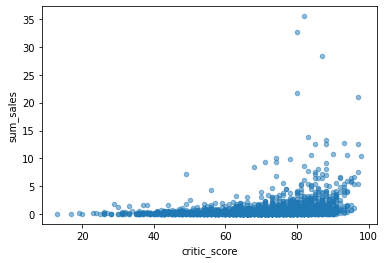

In [ ]:
df[df['platform'] != 'X360'].plot(kind = 'scatter', y = 'sum_sales', x = 'critic_score', alpha = 0.5)

In [ ]:
df[df['platform'] != 'X360']['sum_sales'].corr(df['critic_score'])

0.2664017938165241

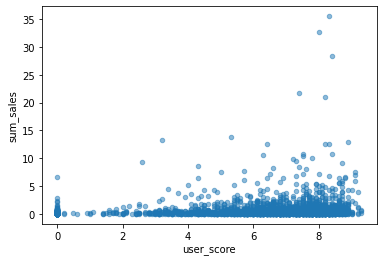

In [ ]:
sample[sample['platform'] != 'X360'].plot(kind = 'scatter', y = 'sum_sales', x = 'user_score', alpha = 0.5)

In [ ]:
sample[sample['platform'] == 'X360']['sum_sales'].corr(sample['user_score'])

0.1658649994457136

С остальными платформами такая же ситуация.

In [ ]:
df['genre'].unique()

array(['Racing', 'Sports', 'Platform', 'Misc', 'Action', 'Shooter',
       'Role-Playing', 'Fighting', 'Simulation', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

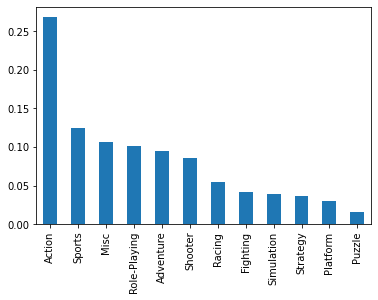

In [ ]:
df['genre'].value_counts(normalize = True).plot(kind = 'bar')

Основные жанры это:
 - 25% от всех игр экшен
 - спорт - 12,5% 
 - разное и рпг - 10%
 - остальное меньше 10%

In [ ]:
genres_pivot = df.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = ['sum', 'mean', 'median'])

In [ ]:
genres_pivot = genres_pivot.reset_index()

In [ ]:
genres_pivot.columns = ['genre', 'sum_sales', 'mean_sales', 'median_sales']

In [ ]:
genres_pivot.sort_values('mean_sales', ascending = False)

,genre,sum_sales,mean_sales,median_sales
8,Shooter,600.81,1.092382,0.355
4,Platform,174.62,0.914241,0.250
10,Sports,514.07,0.642587,0.230
6,Racing,214.14,0.617118,0.180
7,Role-Playing,340.45,0.527012,0.160
2,Fighting,140.68,0.521037,0.200
0,Action,856.39,0.499353,0.170
3,Misc,321.71,0.473103,0.170
9,Simulation,97.69,0.393911,0.130
11,Strategy,48.97,0.211991,0.080


In [ ]:
genres_pivot.sort_values('sum_sales', ascending = False)

,genre,sum_sales,mean_sales,median_sales
0,Action,856.39,0.499353,0.170
8,Shooter,600.81,1.092382,0.355
10,Sports,514.07,0.642587,0.230
7,Role-Playing,340.45,0.527012,0.160
3,Misc,321.71,0.473103,0.170
6,Racing,214.14,0.617118,0.180
4,Platform,174.62,0.914241,0.250
2,Fighting,140.68,0.521037,0.200
9,Simulation,97.69,0.393911,0.130
1,Adventure,69.24,0.113322,0.040


Суммарные продажи самые большие у экшенов и шутеров, при этом средние продажи самые большие у шутеров (хотя зачастую эти жанры относятся к одной и той же игре).

На последнем месте паззлы, стратегии и адвенчуры, что не удивительно (не самые популярные жанры).

In [ ]:
platform_pivot = df.pivot_table(index = 'platform', values = ['eu_sales', 'na_sales', 'jp_sales', 'sum_sales'],
                               aggfunc = 'sum').reset_index().sort_values('sum_sales', ascending = False).head(
    5).reset_index(drop = True)                                

Делаю сводник топ-5 платформ по общим продажам.

In [ ]:
platform_pivot['eu_sales'] = platform_pivot['eu_sales'] / platform_pivot['sum_sales']
platform_pivot['jp_sales'] = platform_pivot['jp_sales'] / platform_pivot['sum_sales']
platform_pivot['na_sales'] = platform_pivot['na_sales'] / platform_pivot['sum_sales']

Считаю долю продаж по каждому региону.

In [ ]:
platform_pivot

,platform,eu_sales,jp_sales,na_sales,sum_sales
0,PS3,0.350852,0.088522,0.417026,837.19
1,X360,0.291429,0.011539,0.608827,805.96
2,Wii,0.283970,0.078186,0.553621,601.26
3,PS4,0.449131,0.050805,0.346151,314.14
4,3DS,0.237656,0.390287,0.320585,257.81


Получаю следующее распределение продаж:
- хбокс360 лидер Америка - 60%;
- пс3 лидер Америка - 41%;
- ви лидер Америка - 55%;
- пс4 лидер Европа - 44%;
- 3дс лидер Япония - 45%;

In [ ]:
genre_pivot = df.pivot_table(index = 'genre', values = ['eu_sales', 'na_sales', 'jp_sales', 'sum_sales'],
                               aggfunc = 'sum').reset_index().sort_values('sum_sales', ascending = False).head(
    5).reset_index(drop = True)

Делаю сводник топ-5 жанров по регионам.

In [ ]:
genre_pivot

,genre,eu_sales,jp_sales,na_sales,sum_sales
0,Action,290.56,80.02,386.67,856.39
1,Shooter,207.48,15.81,306.58,600.81
2,Sports,174.63,25.30,257.26,514.07
3,Role-Playing,83.15,101.87,126.39,340.45
4,Misc,90.26,24.90,177.09,321.71


In [ ]:
genre_pivot[['genre', 'eu_sales']].sort_values('eu_sales', ascending = False)

,genre,eu_sales
0,Action,290.56
1,Shooter,207.48
2,Sports,174.63
4,Misc,90.26
3,Role-Playing,83.15


В Европе:
1. Экшн
2. Шутер
3. Спорт
4. Разное
5. РПГ

In [ ]:
genre_pivot[['genre', 'jp_sales']].sort_values('jp_sales', ascending = False)

,genre,jp_sales
3,Role-Playing,101.87
0,Action,80.02
2,Sports,25.30
4,Misc,24.90
1,Shooter,15.81


В Японии:
1. РПГ
2. Экшн
3. Спорт
4. Шутер
5. Разное

In [ ]:
genre_pivot[['genre', 'na_sales']].sort_values('na_sales', ascending = False)

,genre,na_sales
0,Action,386.67
1,Shooter,306.58
2,Sports,257.26
4,Misc,177.09
3,Role-Playing,126.39


В Америке:
1. Экшн
2. Шутер
3. Спорт
4. Разное
5. РПГ


In [ ]:
df['na_sales'].corr(df['rating'], method = 'spearman')

-0.03928004743887283

In [ ]:
df['jp_sales'].corr(df['rating'], method = 'spearman')

0.2048835890936614

In [ ]:
df['eu_sales'].corr(df['rating'], method = 'spearman')

0.06874778568729115

Использую метод Спирмена для расчета корреляции, так как Пирсон не работает с НЕ числовыми значениями.
Возрастные рейтинги не влияют на продажи во всех регионах.

## Проверка гипотез

Необходимо определить одинаковы ли средние пользовательские рейтинги платформ PC и Xbox One.
Нулевая гипотеза должна иметь знак равенства, следуя из этого считаю:
- нулевой гипотезой - Средние рейтинги равны;
- альтернативной гипотезой - средний рейтинги различаются.
Пороговым значением считаю 5%.

In [ ]:
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'ignore').copy()

Преобразовываю столбец с пользовательским рейтингом в числовое значение.

In [ ]:
df = df[df['user_score'] != 0]

При проверках гипотез не буду учитывать нулевые значения рейтинга, так как это на самом деле значения с неопределенным рейтингом.

In [ ]:
df[df['platform'] == 'PC']['user_score'].mean()

6.717475728155345

In [ ]:
df[df['platform'] == 'XOne']['user_score'].mean()

6.52142857142857

In [ ]:
df[df['platform'] == 'PC']['user_score'].var()

2.3624955611801606

In [ ]:
df[df['platform'] == 'XOne']['user_score'].var()

1.9069968429360702

Используем Т-тест для проверки равенства двух средних в выборках.

In [ ]:
results = st.ttest_ind(df[df['platform'] == 'XOne']['user_score'], df[df['platform'] == 'PC']['user_score'], 
                       equal_var = False, nan_policy = 'omit')
results.pvalue

0.11111296036737636

Не отвергаю нулевую гипотезу: средние значения различаются на 0.2, а с вероятностью 11% такой разброс можно встретить случайно.

Необходимо определить различны ли средние пользовательские игры жанров Экшн и Спорт.
Нулевая гипотеза должна иметь знак равенства, исходя из этого считаю:
- нулевой гипотезой - Средние рейтинги равны;
- альтернативной гипотезой - средний рейтинги различаются.
Пороговым значением считаю 5%.

In [ ]:
df[df['genre'] == 'Sports']['user_score'].mean()

6.138577586206903

In [ ]:
df[df['genre'] == 'Sports']['user_score'].var()

2.9795668708572274

In [ ]:
df[df['genre'] == 'Action']['user_score'].mean()

6.869284294234608

In [ ]:
df[df['genre'] == 'Action']['user_score'].var()

1.756876502180939

Использую Т-тест для проверки равенства двух средних в выборках.

In [ ]:
results = st.ttest_ind(df[df['genre'] == 'Sports']['user_score'], df[df['genre'] == 'Action']['user_score']
                       , equal_var = False, nan_policy = 'omit')
results.pvalue

2.6060510502943962e-15

p-значение очень маленькое (10 в минус 15 степени), отвергаю нулевую гипотезу.

## Вывод

В процессе исследования были выполнены следующие работы:

### Предобработка и обзор данных:

- проведена проверка данных на дубликаты;
- обнаружено очень много пропущенных значений в столбцах год выпуска, название, жанр, оценки и рейтинг;
- пропуски не заполнялись, так как их было или невозможно заполнить, или заполнение могло повлият на результаты исследования;
- данные были преобразованы в типы, нужные для дальнейшего исследования.

### Анализ данных

#### Общий анализ:

- посчитаны суммарные продажи по каждой игре;
- исследовано количество выпускаемых игр в разные годы, обнаружен большой рост после `1998` года;
- обнаружена самая популярная игровая платформа (по суммарным продажам) - **PS2**;
- обнаружено, что примерная продолжительность жизни игровой платформы - `10` лет;
- определен актуальный период `10` лет, на основе примерной продолжительности жизни платформы;
- исключены не актуальные платформы (угасающие): **DC**, **GBA**, **GC**, **PS2**, **XB**, **DS**;
- построен "ящик с усами", обнаружено, что по медианным суммарным продажам лидирует **Х360** и **PS3**, а **PC** на одной из самых низких позиций;
- построены диаграммы рассеяния по суммарным продажам относительно отзывов критиков для **Х360** и отдельно остальных платформ;
- обнаружено отсутствие зависимости продаж от отзывов (имеем коэффициенты корреляции для **Х360**: `0.38` критики, `0.16` пользователи, для остальных платформ: `0.26` критики, `0.16` пользователи;
- определено распределение жанров:  `25%` от всех игр **Action**, **Sports** - `12,5%`, **Misc** и **Role-Playing** - `10%`, остальные менее `10%`;
- определена суммарная доходность с каждого жанра (в млн): Топ3: **Action** - `856`, **Shooter** - `600`, **Sports** `514`; Худшие3: **Adventure** - `69`, **Strategy** - `48`, **Puzzle** - `20`;

#### Анализ регионов:
Распределение продаж по регионам:
- **Х360** лидер Америка - `60%`;
- **PS3** лидер Америка - `41%`;
- **Wii** лидер Америка - `55%`;
- **PS4** лидер Европа - `44%`;
- **3DS** лидер Япония - `45%`;

Топ продаж по жанрам в Европе:
1. **Action**
2. **Shooter**
3. **Sports**
4. **Misc**
5. **Role-Playing**

Топ продаж по жанрам в Японии:
1. **Role-Playing**
2. **Action**
3. **Sports**
4. **Shooter**
5. **Misc**

Топ продаж по жанрам в Америке:
1. **Action**
2. **Shooter**
3. **Sports**
4. **Misc**
5. **Role-Playing**

Обнаружено отсутствие зависимости продаж от рейтинга ESRB.
Коэффициенты корреляции: `0.03`, `0.20`, `0.06`.

### Проверка гипотез.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулированы гипотезы:
- нулевая - Средние рейтинги равны;
- альтернативная - средние рейтинги различаются.

Пороговым значением принято `5%`.

Проведен Т-тест, обнаружено, что средние значения различаются на `0.2`, а с вероятностью такой или больший разброс можно встретить случайно, что свидетельствует о том, что нулевую гипотезу отвергнуть нельзя.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулированы гипотезы:
- нулевой гипотезой - Средние рейтинги равны;
- альтернативной гипотезой - средний рейтинги различаются.

Пороговым значением принято `5%`.

Проведен Т-тест, обнаружено, что средние значения различаются на `0.7`, однако вероятность встретить такое различие случайно `10` в минус `15` степени, что очень мало. Нулевая гипотеза отвергнута.